# **COMP 2211 Exploring Artificial Intelligence**
## Convolutional Neural Network

![cnn.png](https://miro.medium.com/max/1400/1*irWQaiIjHS27ZAPaVDoj6w.png)

## **Review** ##
Before we start, let's have a quick recap of the lecture.

**Check your Colab open the GPU accelerator:**

***1. 'Edit' -> 'Notebook settings':***

![gpu1.png](https://drive.google.com/uc?export=view&id=19RK_MicAY8J4BIY5g0i7bw6sr3WEFaDz)


***2. Set 'Hardware accelerator'***:

![gpu2.png](https://drive.google.com/uc?export=view&id=1kTK1oZ-UWdIr0hxbXVT8GQDHMGHXVbLI)


In [ ]:
# check your Colab device
import tensorflow as tf # Import tensorflow library
import pprint           # Import pprint library for better print format

device_name = tf.config.list_physical_devices() # A list of divece name, which could contain CPU and GPU
pprint.pprint(device_name)                      # Print the device_name

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Procedure of CNN task

1. Import required libraries and define global variables
2. Data preprocessing
3. Build the model
4. Compile the model
5. Train the model
6. Evalutate the model
7. Save the model

## 1. Import required libraries and define global variables

In [ ]:
import numpy as np                                                     # Import numpy library
import matplotlib.pyplot as plt                                        # Import mathplot library
import datetime                                                        # Import datetime library
from pprint import pprint                                              # Import pprint library
from keras.datasets import mnist                                       # Import MNIST dataset
from keras.models import Sequential                                    # Import Sequential class
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # Import Conv2D, MaxPooling2D, Dense, Dropout, Flatten class
from keras.utils import np_utils                                       # Import np_utils utilities

batch_size = 128             # Number of samples per gradient update
num_classes = 10             # Number of classes in the dataset
epochs = 10                  # Number of epochs to train the model
img_rows, img_cols = 28, 28  # Image dimensions

## 2. Data preprocessing

Keras contains MNIST dataset which is the images of handwritten digis from 0 to 9.

In [ ]:
# Load MNIST dataset
# x_train is a NumPy array of grayscale image data with shape (60000, 28, 28)
# y_train is a NumPy array of digit labels (in range 0-9) with shape (60000,)
# x_test is a NumPy array of grayscale image data with shape (10000, 28, 28)
# y_test is a NumPy array of digit labels (in range 0-9) with shape (10000,)
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Load MNIST dataset from Keras
print('Shape of train set: {}, Shape of test set: {}'.format(x_train.shape, x_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Shape of train set: (60000, 28, 28), Shape of test set: (10000, 28, 28)


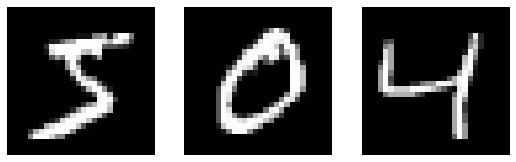

In [ ]:
# Show some samples from MNIST dataset
figure, ax = plt.subplots(1, 3, figsize= (9,3)) # Create a figure and a set of subplots (with 1 row 3 columns), figure size 9 x 3
for i in range(3):
  ax[i].imshow(x_train[i], cmap='gray')         # Show the first three images in train set
  ax[i].axis('off')                             # Turn the axis off
figure.show()                                   # Display the figure window

In [ ]:
# Reshape the data to 4-dimension. The last dimension represent the number of channels.
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# There are 10 classes and classes are represented as unique integers(0 to 9).
# To do so, transforming the integer into a 10 element binary vector.
# eg. [2] -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_train = np_utils.to_categorical(y_train, num_classes)  # Shape from (60000,) -> (60000, 10)
y_test = np_utils.to_categorical(y_test, num_classes)  # Shape from (10000,) -> (10000, 10)

## 3. Build the Model

General CNN contains two main parts: **Convolutional Layer** and **Fully Connected(FC) Layer**

> General Pipeline: Input -> **Conv Layer** -> Flatten Operation -> **FC Layer** -> Output

### Convolutional Layer
- Convolution
- Pooling
- Activation Layer
- Dropout (optional)

### FC Layer
- Dense Layer (Linear Layer)
- Activation Layer
- Dropout

In [ ]:
# Create the Model
# Method 1
model = Sequential()  # Create a Sequential object
# ----- Convolutional Layer -----
# Add a convolutional layer with 32 kernels, each of size 3x3
# Use ReLU activation function, padding='valid', strides=(1, 1)
# Specify the input size to this convolutional layer: (28, 28, 1)
# Note: Input size needs to be specified for the first layer only
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add another convolutional layer with 64 kernels, each of size 3x3
# Use ReLU activation function, padding='valid', strides=(1, 1)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add a max pooling layer of size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer to prevent a model from overfitting
model.add(Dropout(0.25))
# -------------------------------
# Add a flatten layer to convert the pooled data to a single column
model.add(Flatten())  # Flatten operation. Shape from (B, H, W, C) -> (B, H*W*C)
# ---------- FC Layer -----------
# Add a dense layer (fully-connected layer) and use ReLU activation function
model.add(Dense(units=128, activation='relu'))
# Add a dropout layer to prevent a model from overfitting
model.add(Dropout(0.5))
# Add a dense layer (fully-connected layer) and use Softmax activation function
model.add(Dense(units=10, activation='softmax'))


# Method 2
model2 = Sequential(
    [Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Add a convolutional layer with 32 kernels, each of size 3x3
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                            # Add another convolutional layer with 64 kernels, each of size 3x3
    MaxPooling2D(pool_size=(2, 2)),                                                       # Add a max pooling layer of size 2x2
    Dropout(0.25),                                                                        # Add a dropout layer to prevent a model from overfitting
    Flatten(),                                                                            # Add a flatten layer to convert the pooled data to a single column
    Dense(units=128, activation='relu'),                                                  # Add a dense layer (fully-connected layer) and use ReLU activation function
    Dropout(0.5),                                                                         # Add a dropout layer to prevent a model from overfitting
    Dense(units=10, activation='softmax')]                                                # Add a dense layer (fully-connected layer) and use Softmax activation function
)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1179776   
                                                      

## 4. Compile the Model
- Optimizer: 'adam' or 'sgd'.
- Loss: 'categorical_crossentropy' for classification task.
- Metrics: 'accuracy' for claasification task.

In [ ]:
# Compile the model, i.e., configures the model for training
# Use crossentropy loss function since there are two or more label classes
# Use adam algorithm (a stochastic gradient descent method)
# Use accuracy as metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 5. Train the Model

In [ ]:
# Fit the model, i.e., train the model
# Specify training data and labels
# Specify batch size, i.e., number of samples per gradient update
# Specify validation data, i.e., data on which to evaluate the loss
training_history = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 16s 9ms/step - loss: 0.7368 - accuracy: 0.8639 - val_loss: 0.0696 - val_accuracy: 0.9796
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1519 - accuracy: 0.9565 - val_loss: 0.0475 - val_accuracy: 0.9845
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1142 - accuracy: 0.9664 - val_loss: 0.0475 - val_accuracy: 0.9851
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0904 - accuracy: 0.9736 - val_loss: 0.0400 - val_accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0815 - accuracy: 0.9759 - val_loss: 0.0398 - val_accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0715 - accuracy: 0.9782 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.0375 - val_accuracy: 0.9899
Epoch

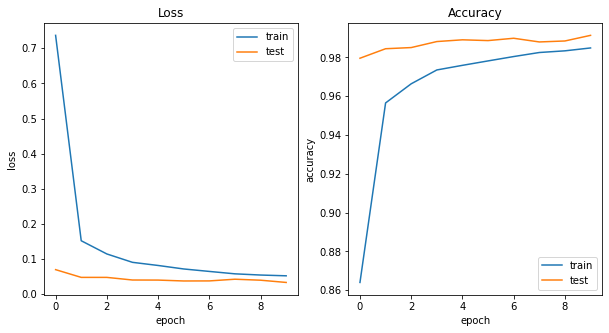

In [ ]:
# Visualize the Loss and Accuracy from training_history
figure, ax = plt.subplots(1, 2, figsize= (10,5))      # Create a figure and a set of subplots (with 1 row 3 columns), figure size 9 x 3
ax[0].plot(training_history.history['loss'])          # Plot the training loss
ax[0].plot(training_history.history['val_loss'])      # Plot the validation loss
ax[0].set_title('Loss')                               # Set the title
ax[0].set_xlabel('epoch')                             # Set the label of x axis
ax[0].set_ylabel('loss')                              # Set the label of y axis
ax[0].legend(['train', 'test'])                       # Set the legend

ax[1].plot(training_history.history['accuracy'])      # Plot the training accuracy
ax[1].plot(training_history.history['val_accuracy'])  # Plot the validation accuracy
ax[1].set_title('Accuracy')                           # Set the title
ax[1].set_xlabel('epoch')                             # Set the label of x axis
ax[1].set_ylabel('accuracy')                          # Set the label of y axis
ax[1].legend(['train', 'test'])                       # Set the legend

figure.show()                                         # Display the figure window

## 6. Evaluate the Model

In [ ]:
# Evaluate the model
# Specify test data and labels
# Set verbose to 0, i.e., slient (no progress bar)
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)  # verbose=0 means no progress bar
print('Validation loss: {}'.format(val_loss))
print('Validation accuracy: {}'.format(val_acc))

Validation loss: 0.033106960356235504
Validation accuracy: 0.9914000034332275


## 7. Save the Model

In [ ]:
# Save the mdoel to an HDFS file
model_name = 'my_model.h5'                # define model name
model.save(model_name, save_format='h5')  # save the model

## An Interesting Website for CNN Visualization
> https://poloclub.github.io/cnn-explainer/

![web.gif](https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_overview_demo.gif)